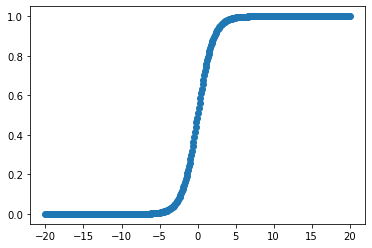

In [19]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

x = torch.unsqueeze(torch.linspace(-20, 20, 400), dim=1)
# y = x.pow(3) + 0.2 * torch.rand(x.size())
y = 1 / (1 + torch.exp(x * -1))

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [20]:
class Net(nn.Module):
    def __init__(self, in_feature, n_hidden, n_hidden_1, out_feature):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(in_feature, n_hidden)
        # self.hidden_1 = torch.nn.Linear(n_hidden, n_hidden_1)
        self.output = torch.nn.Linear(n_hidden, out_feature)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        # x = F.relu(self.hidden_1(x))
        x = self.output(x)
        return x

net = Net(1, 12, 4, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=1, bias=True)
)


In [21]:
optimizer = torch.optim.Adam(net.parameters(), lr = 0.1)
loss_func = nn.MSELoss()

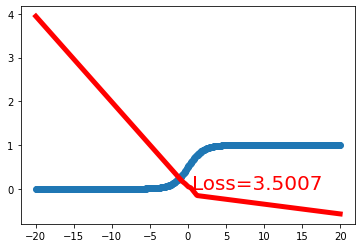

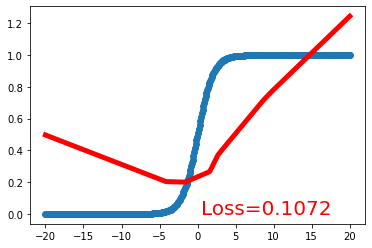

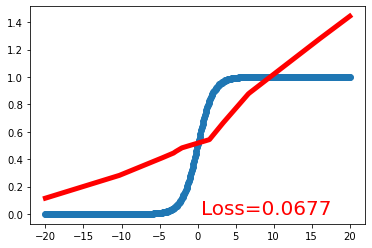

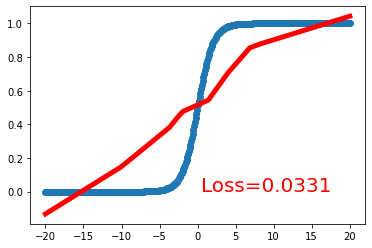

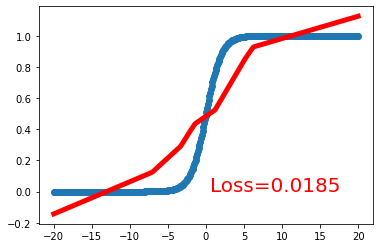

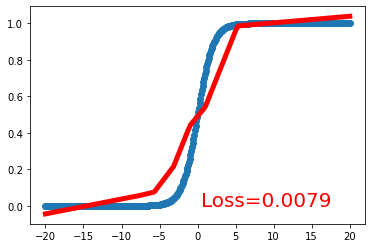

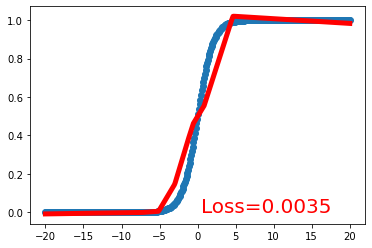

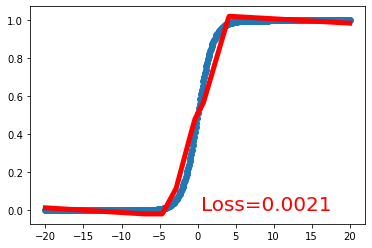

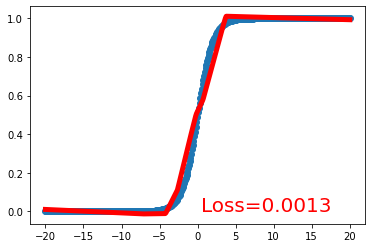

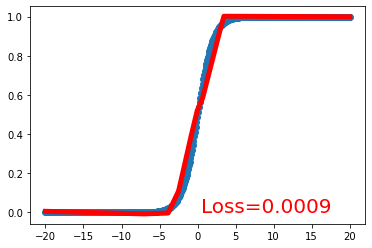

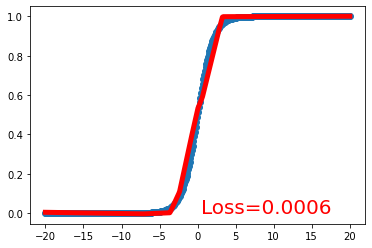

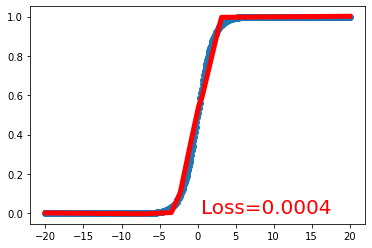

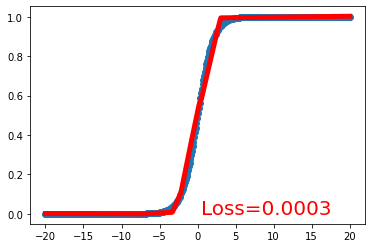

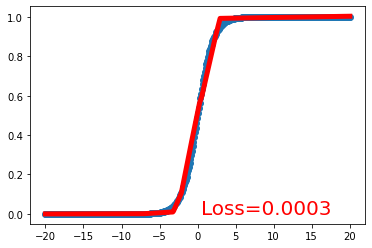

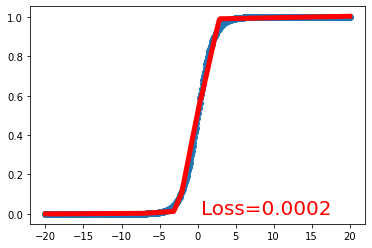

In [22]:
plt.ion()
plt.show()

for t in range(300):
    pred = net(x)
    loss = loss_func(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()